# How to summerize long text?

First how much we can do with Embedding

In [1]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased',output_hidden_states = True)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [3]:
def get_tokens(tokenizer, inputs = '', max_seq_len = 512):
    input_ids = tf.constant(tokenizer.encode(inputs,truncation=False))[None, :max_seq_len]
    return input_ids

In [214]:
os.chdir('/Users/itsukiogihara/Projects/NLP/')
curr_dir = os.getcwd()
File = "./text/quotes.txt"
with open(File, 'r') as f:
  contents = f.read()
contents = contents.split("\n")
lines = []
Files = []
i = 0
for line in contents:
  if (len(line)>0):
    i +=1
    print(i," ",line)
    lines.append(line)


1   Life is what happens when you're busy making other plans.
2   The greatest glory in living lies not in never falling, but in rising every time we fall.
3   The future belongs to those who believe in the beauty of their dreams.
4   The battles that count aren't the ones for gold medals. The struggles within yourself—the invisible battles inside all of us—that's where it's at.
5   Tell me and I forget. Teach me and I remember. Involve me and I learn.
6   In the end, it's not the years in your life that count. It's the life in your years.
7   If you look at what you have in life, you'll always have more. If you look at what you don't have in life, you'll never have enough.
8   Never let the fear of striking out keep you from playing the game.
9   Life is either a daring adventure or nothing at all.
10   Few things can help an individual more than to place responsibility on him, and to let him know that you trust him.
11   Two roads diverged in a wood, and I—I took the one less travele

In [218]:
model_inputs = tokenizer(lines, truncation=True, padding='max_length', max_length=38, return_tensors='tf')
len(model_inputs['input_ids'])
output = model(**model_inputs)


In [1]:
# example of an embedding
output.hidden_states[0][1]

NameError: name 'output' is not defined

In [ ]:
inputs = lines #" ".join(words[0])
#print(inputs)
print(len(tokenizer(inputs,truncation=True)))
tokens = tf.constant(tokenizer.encode(inputs,truncation=True))
token_list = []
shape_list = []
for i in range(len(lines)):
    tokens = tf.constant(tokenizer.encode(lines[i],truncation=True))
    token_list.append(tokens)
    shape_list.append(tokens.shape[0])
max(shape_list)

In [234]:
import scipy.special as sp 
from sklearn.metrics.pairwise import cosine_similarity
mat1 = output.hidden_states[0][1]
mat2 = output.hidden_states[0][2]
embedding = output.hidden_states[0]
cosine_similarity(mat1, mat2)

array([[ 0.99999976,  0.25901273, -0.01571025, ...,  0.01009442,
         0.00876847, -0.0033647 ],
       [ 0.25901273,  0.9999998 ,  0.14929797, ..., -0.30377454,
        -0.26703015, -0.30484462],
       [-0.01415181,  0.07385111,  0.14726049, ...,  0.01657508,
         0.01524661,  0.05148593],
       ...,
       [ 0.01009442, -0.30377454, -0.10161688, ...,  1.0000002 ,
         0.90867996,  0.8626625 ],
       [ 0.00876847, -0.26703015, -0.10415047, ...,  0.90867996,
         1.0000001 ,  0.9086067 ],
       [-0.0033647 , -0.30484462, -0.0592096 , ...,  0.8626625 ,
         0.9086067 ,  0.99999994]], dtype=float32)

<AxesSubplot:>

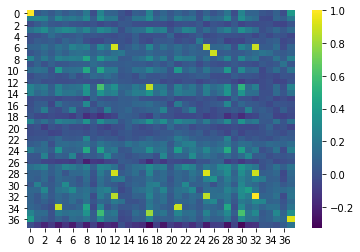

In [237]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
seaborn.heatmap(pd.DataFrame(cosine_similarity(embedding[3], embedding[6])),cmap= 'viridis')

In [254]:
print(np.linalg.det(cosine_similarity(embedding[3], embedding[4])))
print(np.linalg.det(cosine_similarity(embedding[3], embedding[6])))

3.14e-43
9.342941e-37


In [357]:
n=mat.shape[1]
print(n)
#for i in range():

29


In [361]:
vec1 = np.mean(embedding[3], axis=0)
vec2 = np.mean(embedding[6], axis=0)
print(vec1.shape)
mat = np.mean(embedding, axis= 1)
print(mat.shape)
import numpy as np
from sklearn.decomposition import PCA
#PCA
pca = PCA(n_components=min(mat.shape))
pca.fit(mat)



(768,)
(29, 768)


PCA(n_components=29)

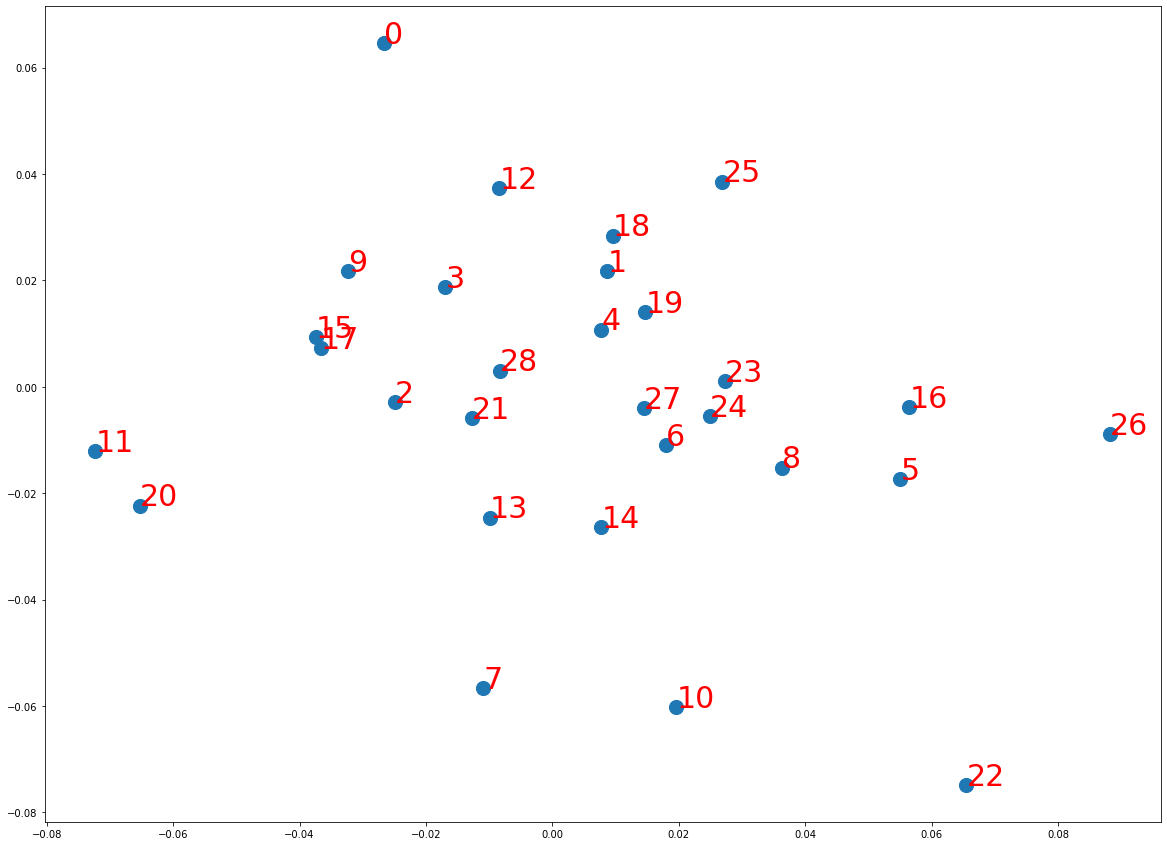

In [383]:
# PCA 
X = pca.components_
X.shape
y = [i for i in range(29)]
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,15))
plt.scatter(X[:,0], X[:,1], s = 200)
for i, label in enumerate(y):
    plt.annotate(label, (X[:,0][i], X[:,1][i]), fontsize = 30, c = 'red')



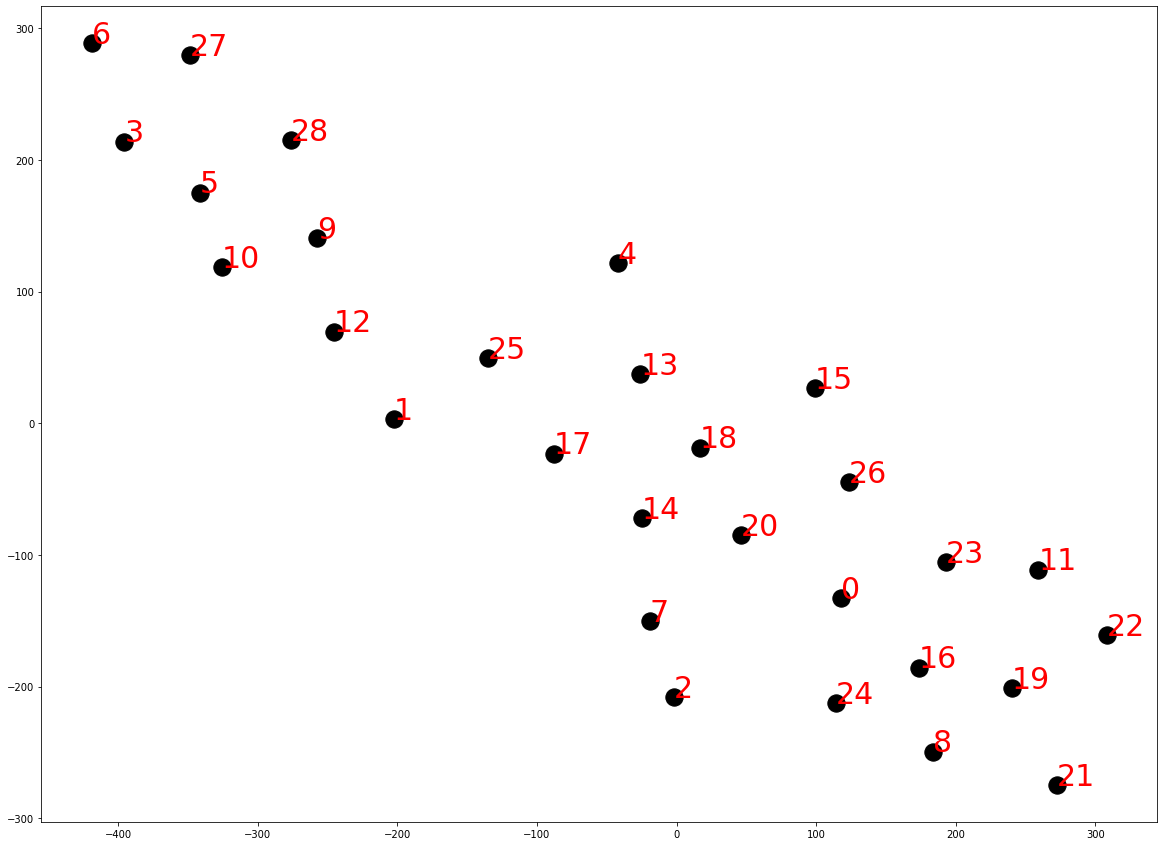

In [380]:
#tsne 2D
X = mat
y =[i for i in range(29)]
from sklearn.manifold import TSNE as TSNE
tsne = TSNE(n_components=2,init='pca', perplexity=10)
tsne_2d = tsne.fit_transform(X =X, y = y)
plt.figure(figsize=(20,15))# .gca(projection='2d')
plt.scatter(
    x=tsne_2d[:,0], 
    y=tsne_2d[:,1], 
    #zs=tsne_3d[:,2], 
    # c=df.loc[rndperm,:]["y"], 
    s = 300,
    c = 'black',
    label = [i for i in range(29)]
)
for i, label in enumerate(y):
    plt.annotate(label, (tsne_2d[:,0][i], tsne_2d[:,1][i]), fontsize = 30, c = 'red')
# ax.set_xlabel('pca-one')
# ax.set_ylabel('pca-two')
# ax.set_zlabel('pca-three')
plt.show()

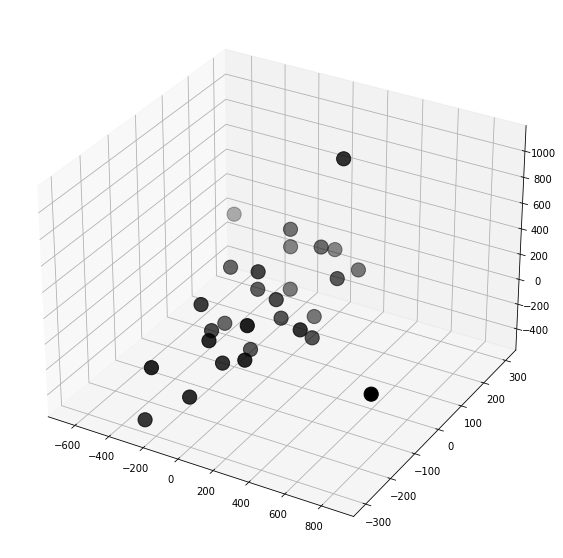

In [393]:
#tsne 3D
X = mat
from sklearn.manifold import TSNE as TSNE
tsne = TSNE(n_components=3,init='pca', perplexity=20)
tsne_3d = tsne.fit_transform(X=X, y =[i for i in range(29)])
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=tsne_3d[:,0], 
    ys=tsne_3d[:,1], 
    zs=tsne_3d[:,2], 
    # c=df.loc[rndperm,:]["y"], 
    cmap='tab10',
    s = 200,
    c = 'black',
    label = [i for i in range(29)], 
)
# ax.set_xlabel('pca-one')
# ax.set_ylabel('pca-two')
# ax.set_zlabel('pca-three')
plt.show()

In [394]:
# euclidean 
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(embedding[3], embedding[4])

array([[2.38418579e-07, 2.21098347e+01, 2.00885792e+01, ...,
        1.84495239e+01, 1.84804955e+01, 1.86522846e+01],
       [1.68767529e+01, 1.95924129e+01, 1.77125340e+01, ...,
        2.00521946e+01, 1.97927532e+01, 2.01605282e+01],
       [2.23487377e+01, 2.33086109e+01, 2.15678711e+01, ...,
        1.98703938e+01, 1.99132881e+01, 1.95025959e+01],
       ...,
       [1.68567085e+01, 2.13818321e+01, 1.91239815e+01, ...,
        1.83431435e+01, 1.90390854e+01, 1.93764477e+01],
       [1.50067005e+01, 2.05409546e+01, 1.93876781e+01, ...,
        1.62878056e+01, 1.55135880e+01, 1.63866692e+01],
       [1.86522846e+01, 2.05624561e+01, 2.05533066e+01, ...,
        6.11247921e+00, 4.99271822e+00, 0.00000000e+00]], dtype=float32)

<AxesSubplot:>

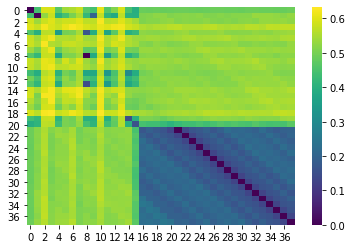

In [396]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
seaborn.heatmap(pd.DataFrame(euclidean_distances(embedding[1], embedding[2])/38),cmap= 'viridis')

In [408]:
# taking det as proxy for dist.
print(np.linalg.det(euclidean_distances(embedding[3], embedding[4])))
print(np.linalg.det(euclidean_distances(embedding[3], embedding[6])))
print(np.linalg.det(cosine_similarity(embedding[3], embedding[4])))
print(np.linalg.det(cosine_similarity(embedding[3], embedding[6])))

55.568375
38313240000.0
3.14e-43
9.342941e-37


In [445]:
# matrix to store the adjacency mat
import numpy as np 
import pandas as pd
n = len(lines) 
similarity_mat = np.zeros(shape=(n,n))
for i in range(n):
    for j in range(n):
        if j!=i:
            similarity_mat[i,j] = abs(np.linalg.det(euclidean_distances(embedding[i], embedding[j])))
pd.DataFrame(similarity_mat)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000e+00,1.266299e+19,1.477829e+24,2.530799e+03,7.509478e+18,6.056751e+13,9.507848e+01,5.999406e+24,1.039400e+26,1.097413e+13,...,6.575284e+23,3.673079e+25,4.639535e+22,6.413551e+24,5.222061e+24,2.782260e+24,5.843497e+19,2.234555e+26,2.603250e+03,1.179356e+13
1,1.266299e+19,0.000000e+00,6.941544e+21,4.859485e+05,4.316969e+19,3.496782e+19,3.302707e+05,2.631752e+21,3.012336e+18,4.667894e+17,...,4.402690e+18,2.268090e+18,1.826415e+17,7.148517e+17,7.471535e+19,1.192005e+20,2.591791e+24,5.853422e+18,2.199464e+08,2.656743e+13
2,1.477829e+24,6.941544e+21,0.000000e+00,1.440375e+04,1.388540e+18,1.873375e+15,4.294602e-01,6.341690e+27,1.317171e+24,2.203773e+15,...,3.812078e+25,1.890656e+25,1.804247e+24,6.357882e+24,3.646884e+24,1.237436e+23,3.437428e+18,1.391705e+26,2.029729e+02,1.395443e+12
3,2.530799e+03,4.859485e+05,1.440375e+04,0.000000e+00,5.556837e+01,1.300132e+13,3.831324e+10,4.543279e+03,2.222889e+01,2.283772e+08,...,9.183989e+00,6.860091e+01,1.036885e+00,9.611184e+01,5.717099e-01,3.855068e-01,1.969869e+03,4.723323e+00,2.913060e+15,9.264083e+07
4,7.509478e+18,4.316969e+19,1.388540e+18,5.556837e+01,0.000000e+00,2.050222e+11,4.370278e-02,5.658857e+18,2.344630e+19,3.430499e+14,...,3.065849e+17,2.384467e+20,1.933015e+17,1.080937e+19,7.282674e+19,8.143465e+18,5.347406e+20,5.446050e+17,1.848770e+00,9.398961e+09
5,6.056751e+13,3.496782e+19,1.873375e+15,1.300132e+13,2.050222e+11,0.000000e+00,6.368398e+06,3.160518e+14,3.155272e+11,1.932402e+18,...,1.347259e+11,1.550948e+14,2.369335e+09,1.072007e+14,2.442555e+11,1.247411e+11,4.330082e+16,1.184105e+12,3.148916e+07,4.186108e+15
6,9.507848e+01,3.302707e+05,4.294602e-01,3.831324e+10,4.370278e-02,6.368398e+06,0.000000e+00,9.541718e-01,1.185105e-02,8.169065e+05,...,1.229200e-05,1.497332e+01,2.088318e-06,1.016310e-02,6.847106e-01,9.787268e-04,3.292932e+01,4.721684e-03,1.338411e+09,3.533648e+09
7,5.999406e+24,2.631752e+21,6.341690e+27,4.543279e+03,5.658857e+18,3.160518e+14,9.541718e-01,0.000000e+00,1.497916e+23,2.522074e+15,...,6.371380e+24,6.818508e+25,5.245259e+24,1.940595e+24,2.589270e+25,2.959476e+23,1.235755e+20,1.575026e+25,1.048297e+03,3.040337e+09
8,1.039400e+26,3.012336e+18,1.317171e+24,2.222889e+01,2.344630e+19,3.155272e+11,1.185105e-02,1.497916e+23,0.000000e+00,3.045503e+12,...,4.713110e+28,1.115312e+23,3.152948e+25,2.269015e+24,5.508885e+25,1.685947e+28,1.406776e+21,6.368694e+25,8.641409e+01,4.210482e+09
9,1.097413e+13,4.667894e+17,2.203773e+15,2.283772e+08,3.430499e+14,1.932402e+18,8.169065e+05,2.522074e+15,3.045503e+12,0.000000e+00,...,1.938727e+12,3.278187e+15,3.362694e+11,2.561635e+11,1.203547e+13,2.302300e+12,3.179217e+18,9.010326e+15,5.973687e+10,4.335055e+15


In [465]:
# min_max
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
norm_sim_mat = scaler.fit_transform(similarity_mat)+1

pd.DataFrame(norm_sim_mat)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.688404,0.728800,0.792542,0.809765,0.645539,0.724009,0.786988,0.721750,0.804033,0.804923,...,0.723310,0.837809,0.708941,0.776151,0.580359,0.798971,0.795914,0.994246,0.811008,0.766919
1,0.688404,0.728778,0.791267,0.809765,0.955511,5.517519,0.787035,0.717651,0.803698,0.814172,...,0.723253,0.794461,0.707046,0.761896,0.535693,0.798916,6.279328,0.730326,0.811008,0.768987
2,0.692799,0.740802,0.791261,0.809765,0.592333,0.724257,0.786987,5.052548,0.803702,0.804966,...,0.726526,0.816773,0.780759,0.776028,0.566886,0.798918,0.795797,0.894698,0.811008,0.765464
3,0.688404,0.728778,0.791261,0.809765,0.580263,0.724002,6.266387,0.717650,0.803698,0.804922,...,0.723253,0.794461,0.707046,0.761896,0.535692,0.798916,0.795790,0.730326,6.291503,0.765269
4,0.688404,0.728852,0.791261,0.809765,0.580263,0.724001,0.786987,0.717650,0.803698,0.804929,...,0.723253,0.794461,0.707046,0.761896,0.535693,0.798916,0.796921,0.730326,0.811008,0.765270
5,0.688404,0.728838,0.791261,0.834230,0.580263,0.724001,0.787898,0.717650,0.803698,0.843212,...,0.723253,0.794461,0.707046,0.761896,0.535692,0.798916,0.795790,0.730326,0.811008,1.351084
6,0.688404,0.728778,0.791261,0.809837,0.580263,0.724001,0.786987,0.717650,0.803698,0.804922,...,0.723253,0.794461,0.707046,0.761896,0.535692,0.798916,0.795790,0.730326,0.811010,0.765269
7,0.706246,0.733337,6.287318,0.809765,0.629452,0.724044,0.786987,0.717650,0.803699,0.804972,...,0.723800,0.874929,0.921343,0.766209,0.757165,0.798921,0.796051,0.748929,0.811008,0.765269
8,0.997526,0.728783,0.792403,0.809765,0.784068,0.724001,0.786987,0.717752,0.803698,0.804922,...,4.769615,0.794592,1.995199,0.766939,1.006893,1.132072,0.798766,0.805546,0.811008,0.765269
9,0.688404,0.728778,0.791261,0.809765,0.580266,0.988901,0.787104,0.717650,0.803698,0.804922,...,0.723253,0.794461,0.707046,0.761896,0.535692,0.798916,0.795797,0.730326,0.811120,1.371928


<AxesSubplot:>

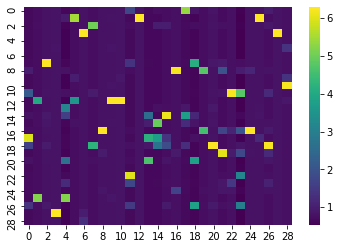

In [466]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
seaborn.heatmap(pd.DataFrame(norm_sim_mat),cmap= 'viridis')

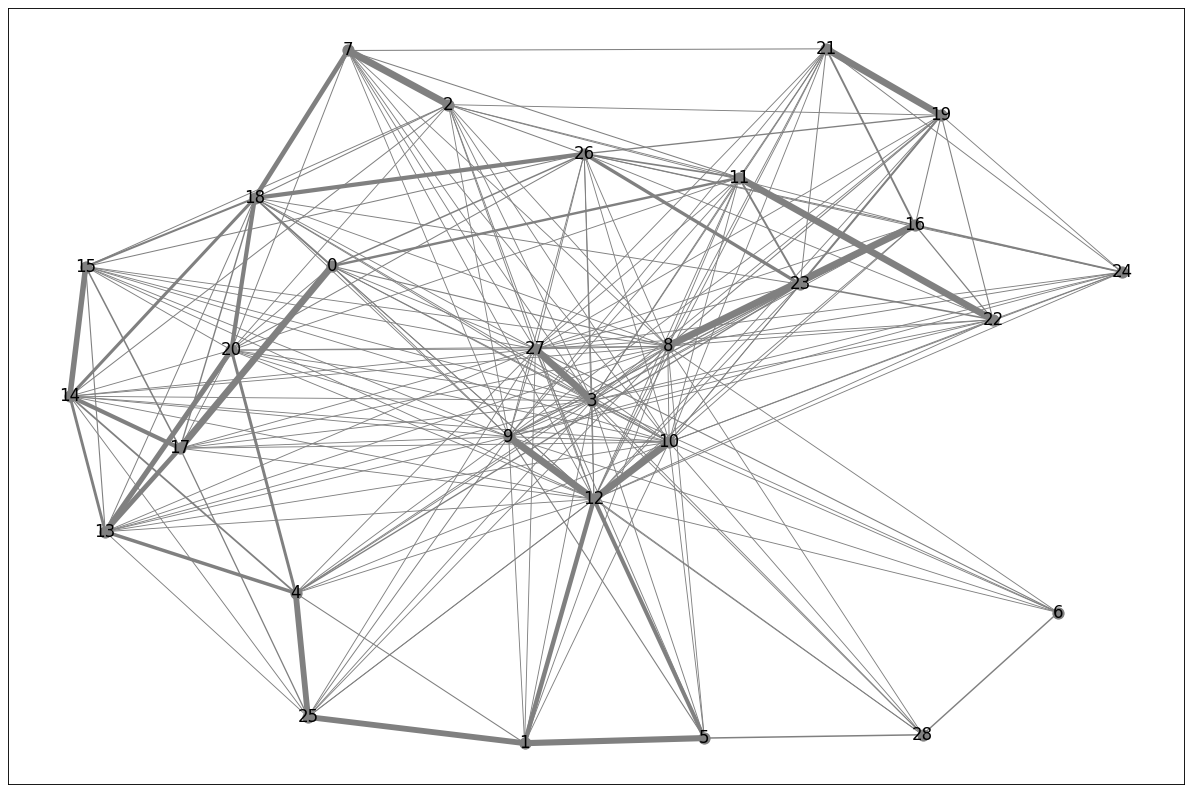

In [472]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
import networkx as nx
import random
import numpy as np 

G = nx.Graph()

for i in range(n):
    for j in range(n):
        if j!=i:
            weight = norm_sim_mat[i][j]
            if weight>0.8:
                G.add_edge(i, j, weight=weight*1)

# elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
# esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
seed = np.random.randint(255)
pos = nx.spring_layout(G, seed=seed)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='gray' )

# # edges
weight = [e['weight'] for (i, j, e) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width= weight, edge_color='gray')
# # nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
# # nx.draw_networkx_edges(
# #     G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
# # )

# # labels
nx.draw_networkx_labels(G, pos, font_size=15, font_family="sans-serif")

#fig, ax = plt.subplots(figsize=(10,15), constrained_layout=True)
ax = plt.gca()
ax.margins(0.008)
#plt.axis("off")
plt.tight_layout()

# plt.show()

In [412]:
def cosine_sim(x, y):
    """derive cosine similarity of given 2 tensors

    Args:
        x (tf.tensor or np.vector): vector embedding #1
        y (tf.tensor or np.vector): vector embedding #2
        # the order does not matter 
    """
    from numpy import dot
    from numpy.linalg import norm

    result = dot(x, y)/(norm(x)*norm(y))
    return result
    
# cosine_sim(embedding[0], embedding[4])
# np.dot(embedding[1], embedding[2])

# What's next
- Try different graphing tools i.e. Neo4J 